# Linear Regression 

# Profit of a food truck in a city

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%pylab inline
%matplotlib inline
pylab.figure(figsize=(50,40))

Populating the interactive namespace from numpy and matplotlib


## Loading the data set and plotting the features

In [4]:
dataset= pd.read_csv('data1.txt',header=None,names=['X1','Y'])
idx=0      
values= np.ones(len(dataset), dtype=np.int)
col_name='X0'
dataset.insert(idx,col_name, values)

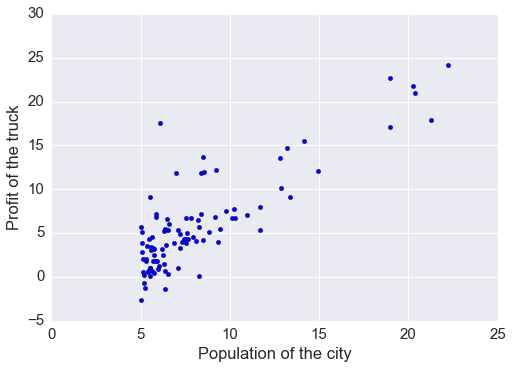

In [18]:
plt.scatter(dataset['X1'],dataset['Y'])
sns.set(font_scale=1.5)
plt.xlabel('Population of the city')
plt.ylabel('Profit of the truck')

## Gradient Descent

In [10]:
def cost_func(h1,dataset):
    sum1=0
    m=len(h1)
    for i in range(0,m):
        sum1=sum1+((h1[i]-dataset['Y'][i])**2)
    cost = (sum1/(2*m))
    return cost


In [11]:
def hypothesis(tethas, datasetx,n):
    h=[]
    for i in datasetx.iterrows(): 
        sum1=0
        for j in range(0,n+1):
            sum1= sum1+i[1][j]*tethas[j]
        h.append(sum1)
    return h  


In [12]:
def derivative(h,dataset,n):
    derivative=np.zeros(n+1)
    k=0
    m=len(dataset)
    for i in dataset.iterrows():
        for j in range(0,n+1):
            derivative[j]=derivative[j]+((h[k]-i[1]['Y'])*i[1][j])
        k+=1
    for i in range(0,n+1): 
        derivative[i]=derivative[i]/m
    return derivative

In [13]:
def gradient_descent(tethas,alpha,numiter,dataset):
    costs=[]
    n=len(tethas)-1 ## number of features
    tethahis=[[] for i in range(n+1)]
    for i in range(0,numiter):
        h=hypothesis(tethas,dataset,n)
        deri=derivative(h,dataset,n)
        for i in range(len(tethahis)):
            tethahis[i].append(tethas[i])
        costs.append(cost_func(h,dataset))
        for i in range(n+1): 
            tethas[i]=tethas[i]-(alpha*(deri[i])) 
    for i in range(n+1):
        tethahis[i].append(tethas[i])
    costs.append(cost_func(h,dataset))
    plt.plot(costs)
    pylab.xlim([-50,1000])

    return tethas,tethahis,costs

## Performing gradient descent and plotting the values of cost function after each iteration

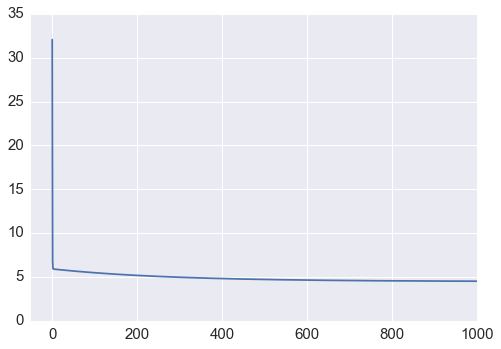

In [15]:
tethas,tethahis,costs= gradient_descent([0,0],0.01,1500,dataset)

## Checking if the resulting curve fits the data

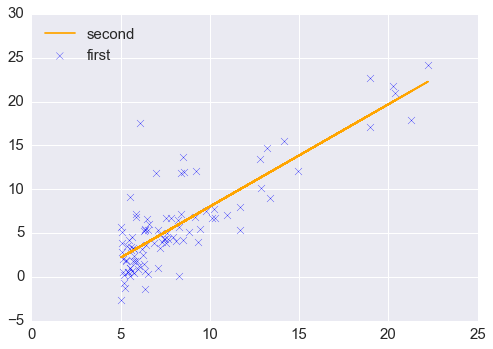

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset['X1'], dataset['Y'], s=50, c='b', marker="x", label='first')
ax1.plot(dataset['X1'],hypothesis(tethas,dataset,1),color="orange", label='second')
plt.legend(loc='upper left');
plt.show()


## Plotting the values of theta after every iteration


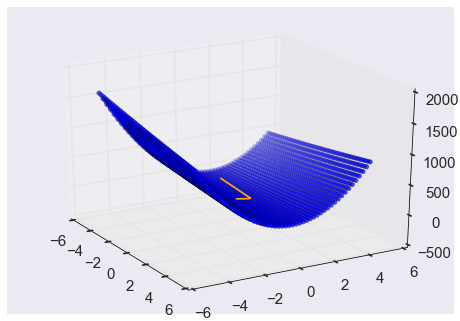

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

my_x=np.arange(-5,5,0.2)
my_y=np.arange(-5,5,0.2)
z=[]
x=[]
y=[]
for i in my_x:
    for j in my_y:
        h=hypothesis([i,j],dataset,1)
        cost=cost_func(h,dataset)
        z.append(cost)
        x.append(i)
        y.append(j)

        
ax.scatter(x,y,z)
ax.plot(tethahis[0],tethahis[1],costs,color="orange")
ax.view_init(25,-30)


# Linear Regression with multiple variables

# Predicting housing prices in Oregon

## Loading the dataset and calculating the mean and standard deviation of each feature

In [21]:
dataset2=pd.read_csv('data2.txt',header=None, names=['X1','X2','Y'])
summary=dataset2.describe()
means={
    'X1':summary['X1']['mean'],
    'X2': summary['X2']['mean'],
    'Y': summary['Y']['mean']}
stds={
    'X1':summary['X1']['std'],
    'X2': summary['X2']['std'],
    'Y': summary['Y']['std']}
print means, stds


{'X2': 3.1702127659574466, 'Y': 340412.6595744681, 'X1': 2000.6808510638298} {'X2': 0.76098188678009993, 'Y': 125039.89958640098, 'X1': 794.70235353388966}


## Normalizing the features

In [22]:
datanew=dataset2.copy()

for i in datanew: 
    datanew[i]=datanew[i].astype(float)
    for j in range(len(datanew[i])):
        datanew[i][j]=(datanew[i][j]-means[i])/stds[i]

/Users/fizaaluthra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


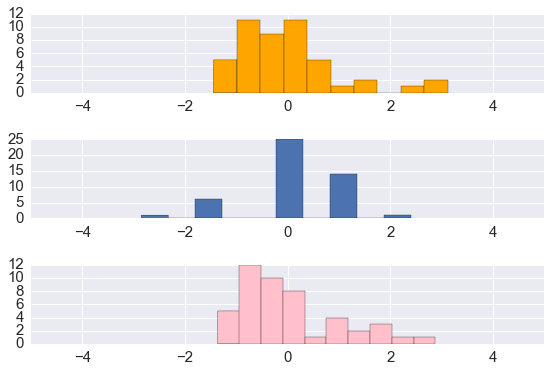

In [23]:
fig = plt.figure()
ax1= fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
ax1.hist(datanew['X1'],color="orange")
ax1.set_xlim(-5,5)
ax2.hist(datanew['X2'])
ax2.set_xlim(-5,5)
ax3.hist(datanew['Y'],color="pink")
ax3.set_xlim(-5,5)
fig.tight_layout() ## Increases spacing between the plots

In [24]:
idx=0      
values= np.ones(len(datanew), dtype=np.int)
col_name='X0'
datanew.insert(idx,col_name, values)



## Performing gradient descent and plotting values of the cost function after each iteration

[-1.1106364055385822e-16, 0.88404234897750456, -0.052455180864743448]


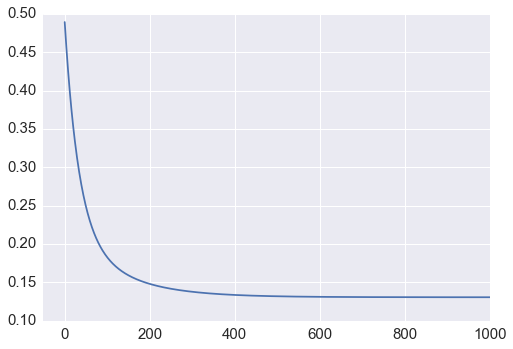

In [25]:
tethas,tethahis,costs= gradient_descent([0,0,0],0.01,1500,datanew)
print tethas
